# Visualizing Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we need to make sure we have 0.20 for Plotting
# !conda update pandas -y

In [4]:
import pandas as pd
print(pd.__version__)

0.20.3


## First Step: Load Data and disassemble for our purposes

In [5]:
df = pd.read_csv('./insurance-customers-300.csv', sep=';')

In [6]:
y=df['group']

In [7]:
X = df.as_matrix()

In [8]:
df.drop('group', axis='columns', inplace=True)

In [9]:
df.describe()

,max speed,age,thousand km per year
count,300.000000,300.000000,300.000000
mean,171.863333,44.006667,31.220000
std,18.807545,16.191784,15.411792
min,132.000000,18.000000,5.000000
25%,159.000000,33.000000,18.000000
50%,171.000000,42.000000,30.000000
75%,187.000000,52.000000,43.000000
max,211.000000,90.000000,99.000000


## Second Step: Use Scatter Plot to plot data over all axis to get an intuition for it

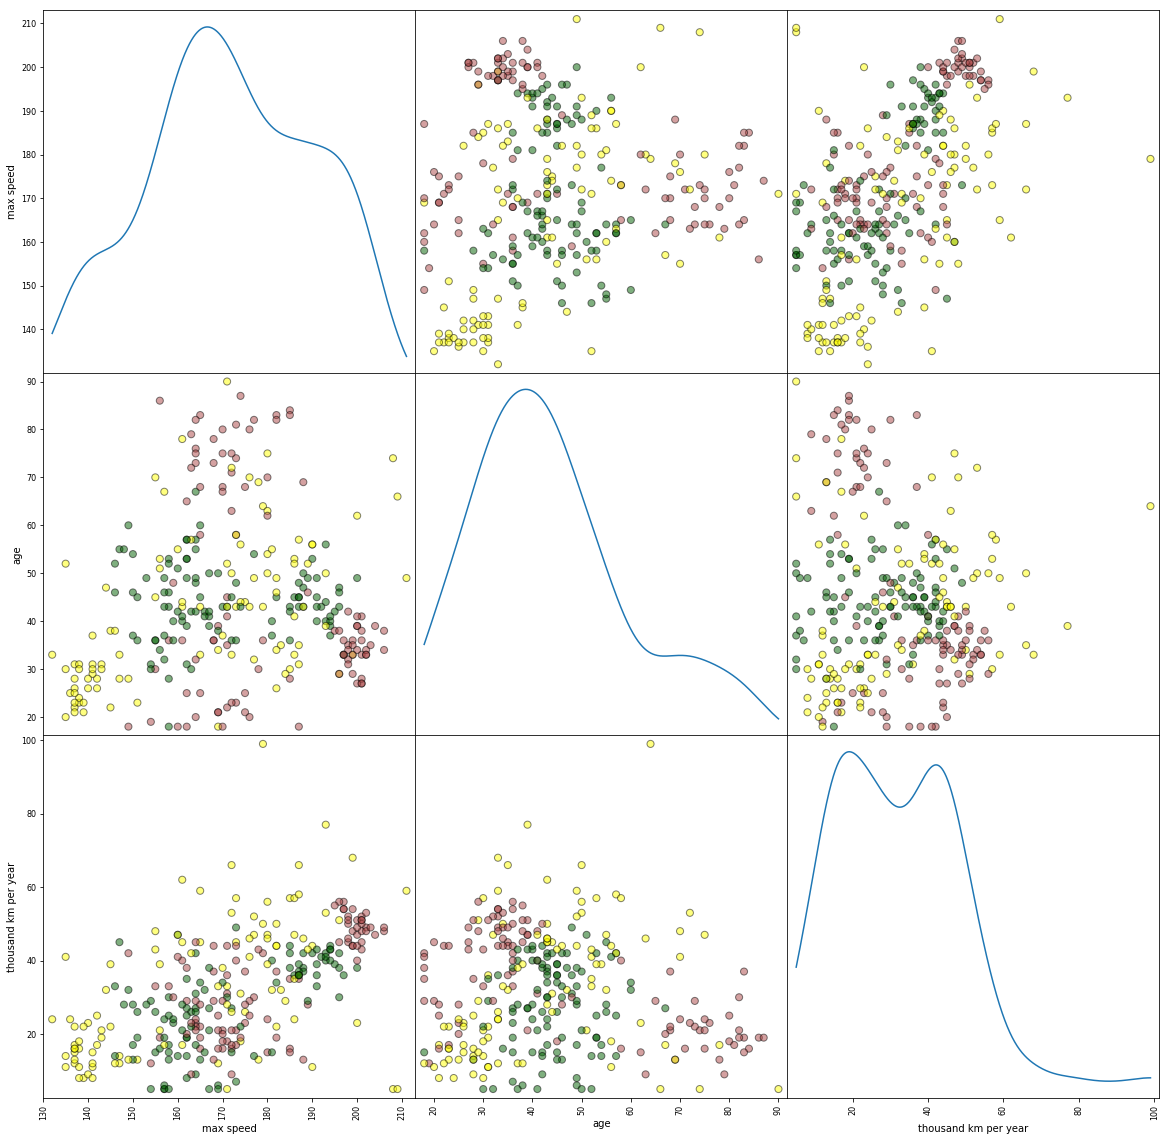

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.clf()
plt.figure(figsize=(20, 20))

CMAP = ListedColormap(['#AA4444', '#006000', '#FFFF00'])

pd.plotting.scatter_matrix(df, c=y, cmap=CMAP, s=200, edgecolor='black', figsize=(20, 20), diagonal='kde')
plt.show()

## Third Step: Choose an intuitive view on your data - plot speed vs age only

In [11]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#AA4444', '#006000', '#AAAA00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)

In [12]:
X_kmh_age = X[:, :2]
X_2_dim = X_kmh_age

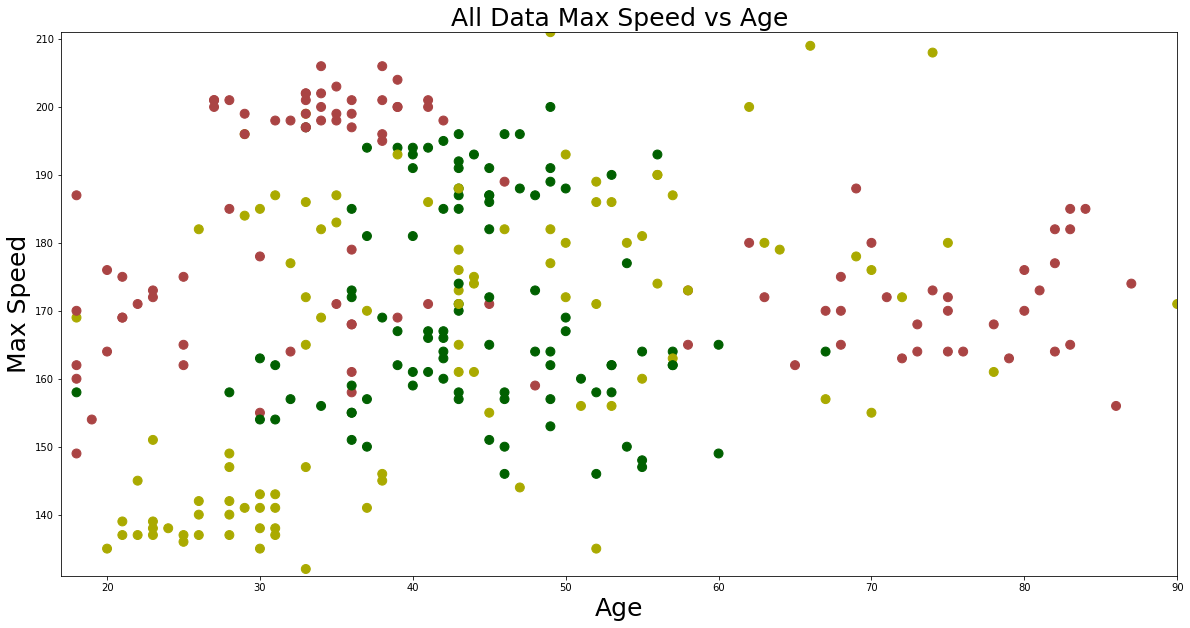

In [13]:
plotPrediction(None, X_2_dim[:, 1], X_2_dim[:, 0], 
               'Age', 'Max Speed', y, mesh=False,
                title="All Data Max Speed vs Age")